In [1]:
import numpy as np
import pandas as pd

## Importing dataset

In [2]:
df = pd. read_csv("predictive_maintenance.csv")

In [3]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


## Binary classification

We can safely drop the UDI and Product ID as they contain unique identifiers. Let's also drop Type of failure as we will not consider it in this exercise.

In [6]:
df = df.drop("UDI", axis=1, errors="ignore")
df = df.drop("Product ID", axis=1, errors="ignore")
df = df.drop("Type", axis=1, errors="ignore")

Now we assign this to a new dataframe named 'df_binary'. Let's make sure to drop the failure type, which will be used later on for the multiclass classification exercise, to only keep a single target label. 

In [7]:
df_binary = df.drop("Failure Type", axis=1, errors="ignore")
df_binary.head(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
5,298.1,308.6,1425,41.9,11,0
6,298.1,308.6,1558,42.4,14,0
7,298.1,308.6,1527,40.2,16,0
8,298.3,308.7,1667,28.6,18,0
9,298.5,309.0,1741,28.0,21,0


In [8]:
s = df_binary["Target"].value_counts()
print(s)

Target
0    9661
1     339
Name: count, dtype: int64


## EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

([<matplotlib.patches.Wedge at 0x132171460>,
 [Text(-1.093767649365066, 0.11692873557179052, 'No Failure'),
  Text(1.0937676411543198, -0.11692881237622857, 'Failure')],
 [Text(-0.5966005360173088, 0.06377931031188573, '96.6%'),
  Text(0.5966005315387198, -0.06377935220521558, '3.4%')])

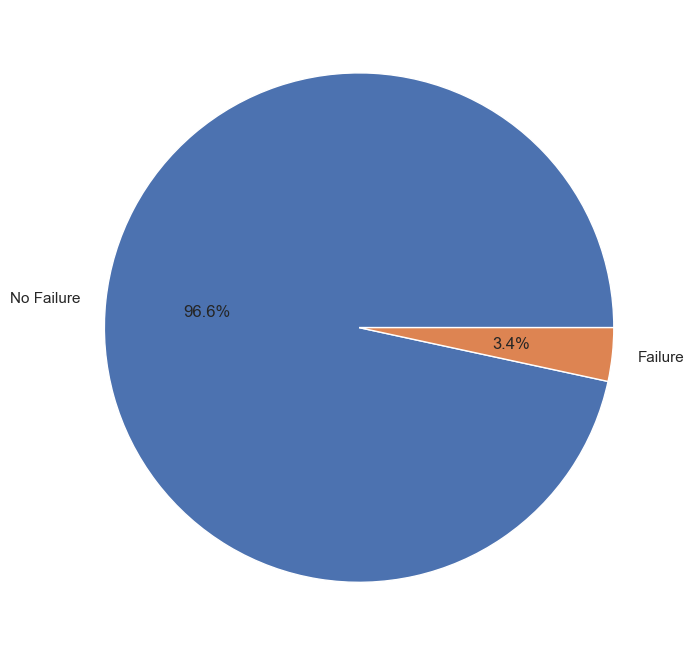

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.pie(s, labels = ["No Failure", "Failure"], autopct="%1.1f%%")

<Axes: >

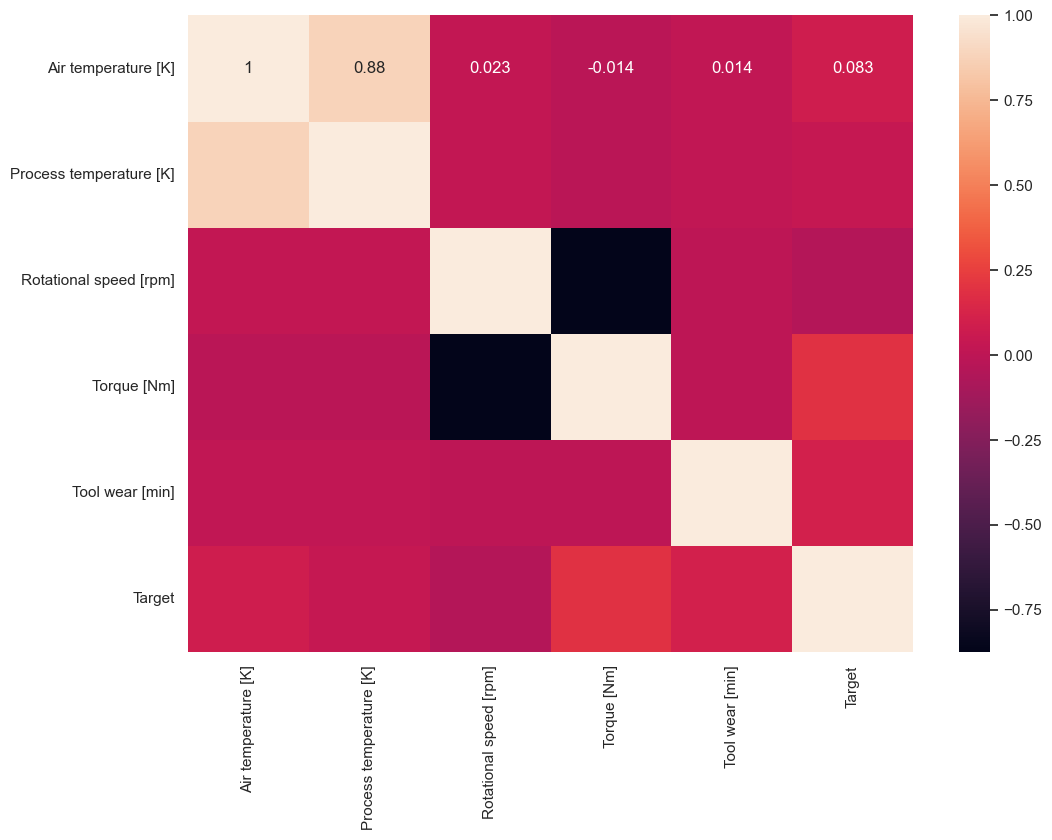

In [11]:
sns.heatmap(df_binary.corr(), annot=True)

Some variables are highly anti-correlated with each other.
Let's now plot each feature with respect to each other in the dataframe, coloring the points depending on the failure status.

/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

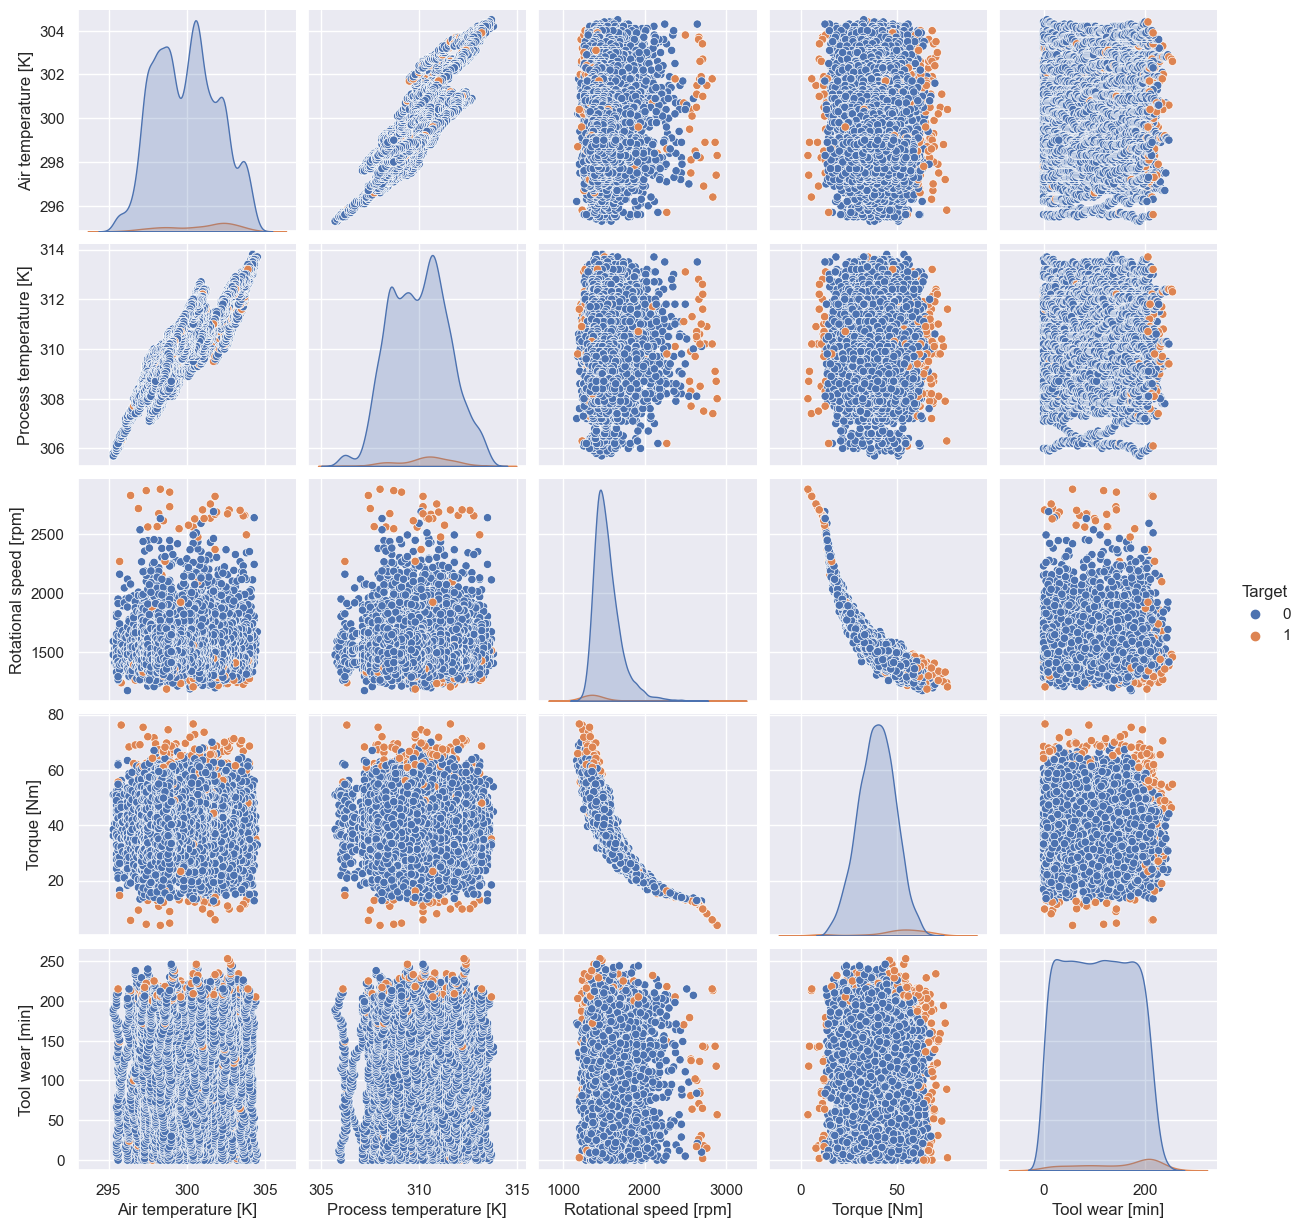

In [12]:
sns.pairplot(data=df_binary, hue="Target", plot_kws=dict(alpha=1.0))

We can also plot boxplos for each feature and each failure status.

/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

Text(0.5, 1.0, 'Tool wear')

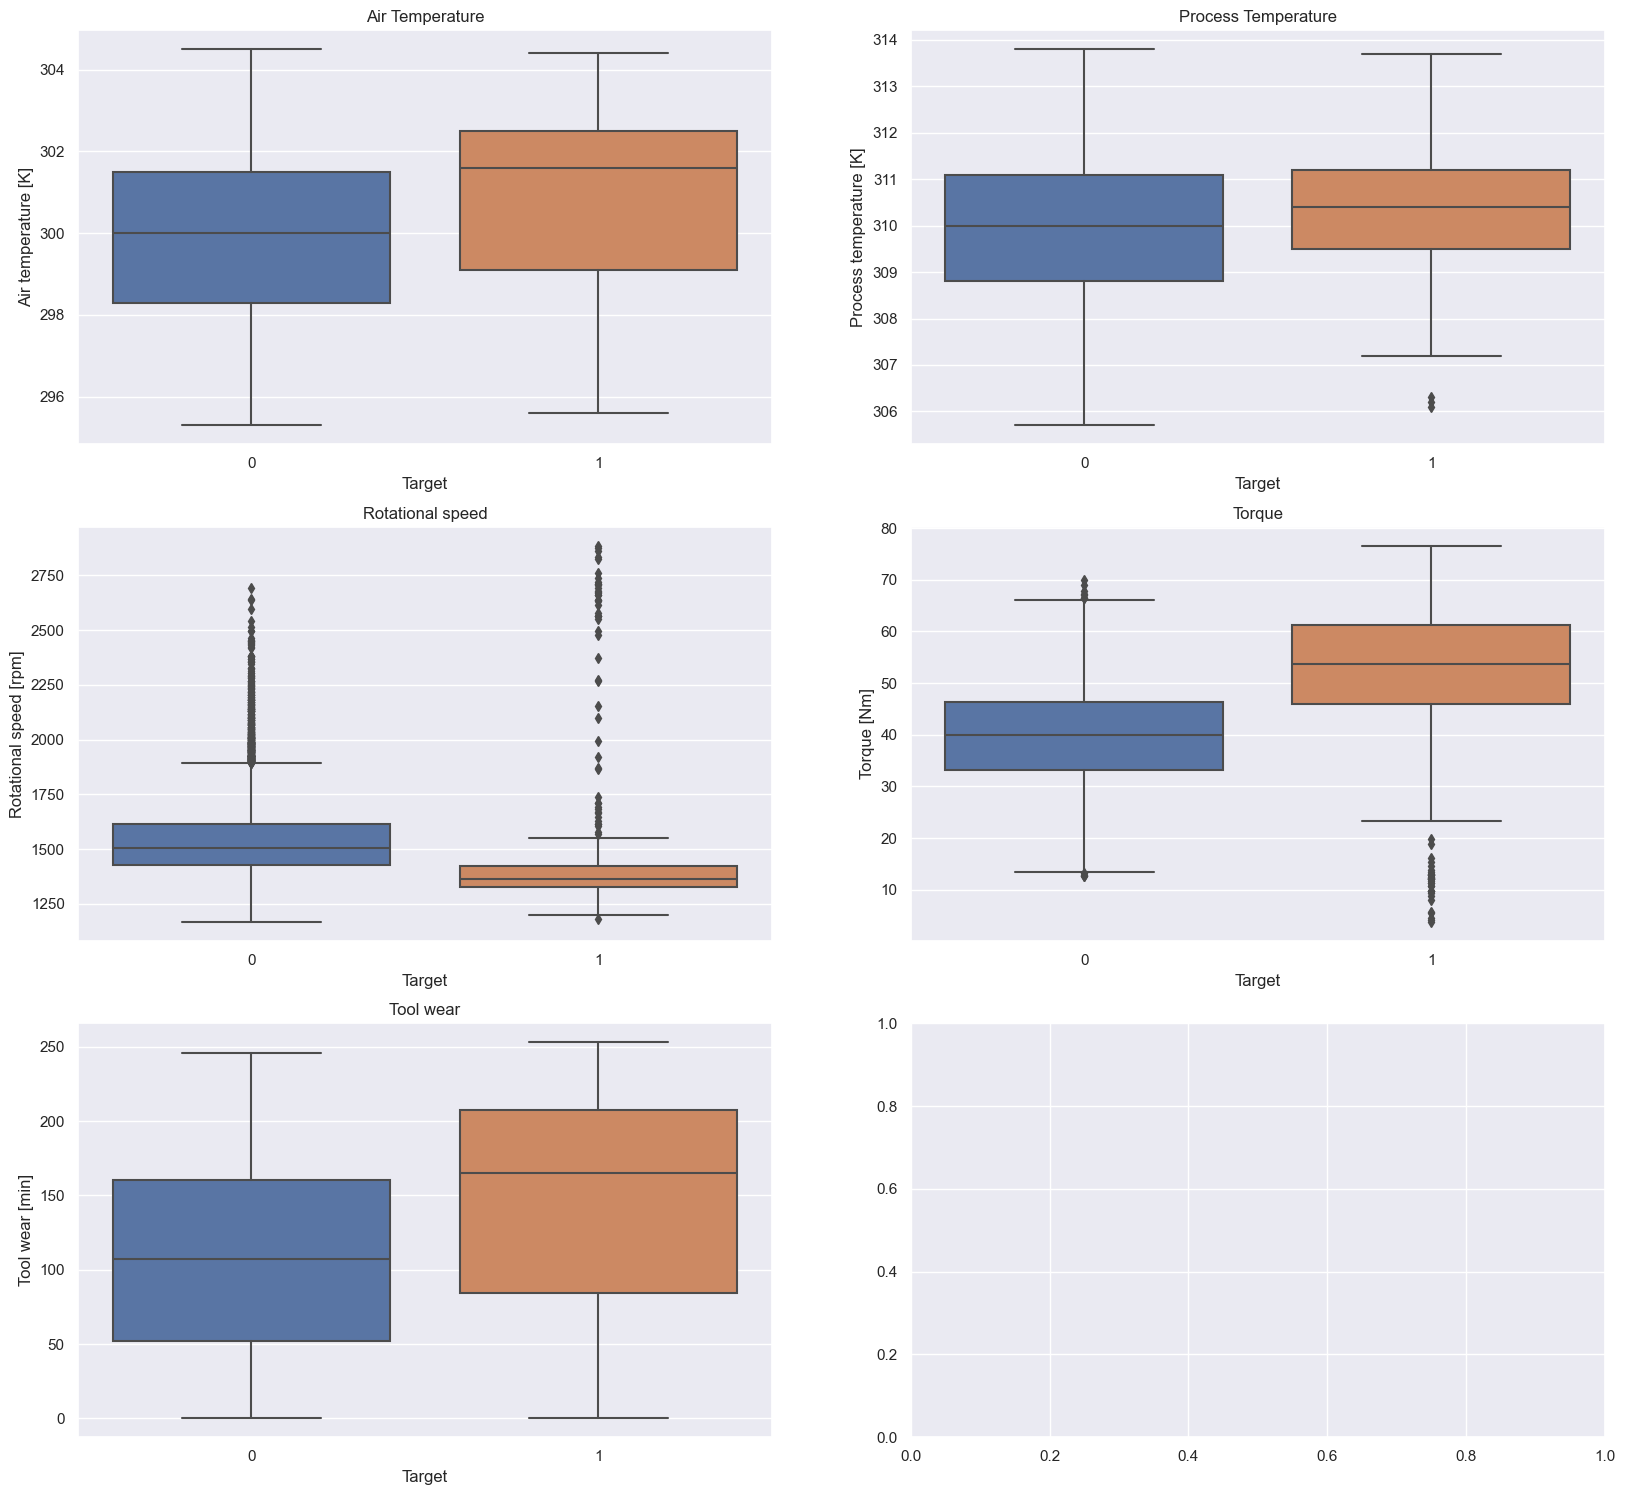

In [13]:
sns.set(rc={'figure.figsize':(19.7,18.27)})
fig, axes = plt.subplots(3, 2)
g1 = sns.boxplot(data=df_binary, y="Air temperature [K]", x="Target", ax=axes[0,0])
g2 = sns.boxplot(data=df_binary, y="Process temperature [K]", x="Target", ax=axes[0,1])
g3 = sns.boxplot(data=df_binary, y="Rotational speed [rpm]", x="Target", ax=axes[1,0])
g4 = sns.boxplot(data=df_binary, y="Torque [Nm]", x="Target", ax=axes[1,1])
g5 = sns.boxplot(data=df_binary, y="Tool wear [min]", x="Target", ax=axes[2,0])

g1.set_title("Air Temperature")
g2.set_title("Process Temperature")
g3.set_title("Rotational speed")
g4.set_title("Torque")
g5.set_title("Tool wear")

Violin plots can be easier to understand at first sight as well.

/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

Text(0.5, 1.0, 'Tool wear')

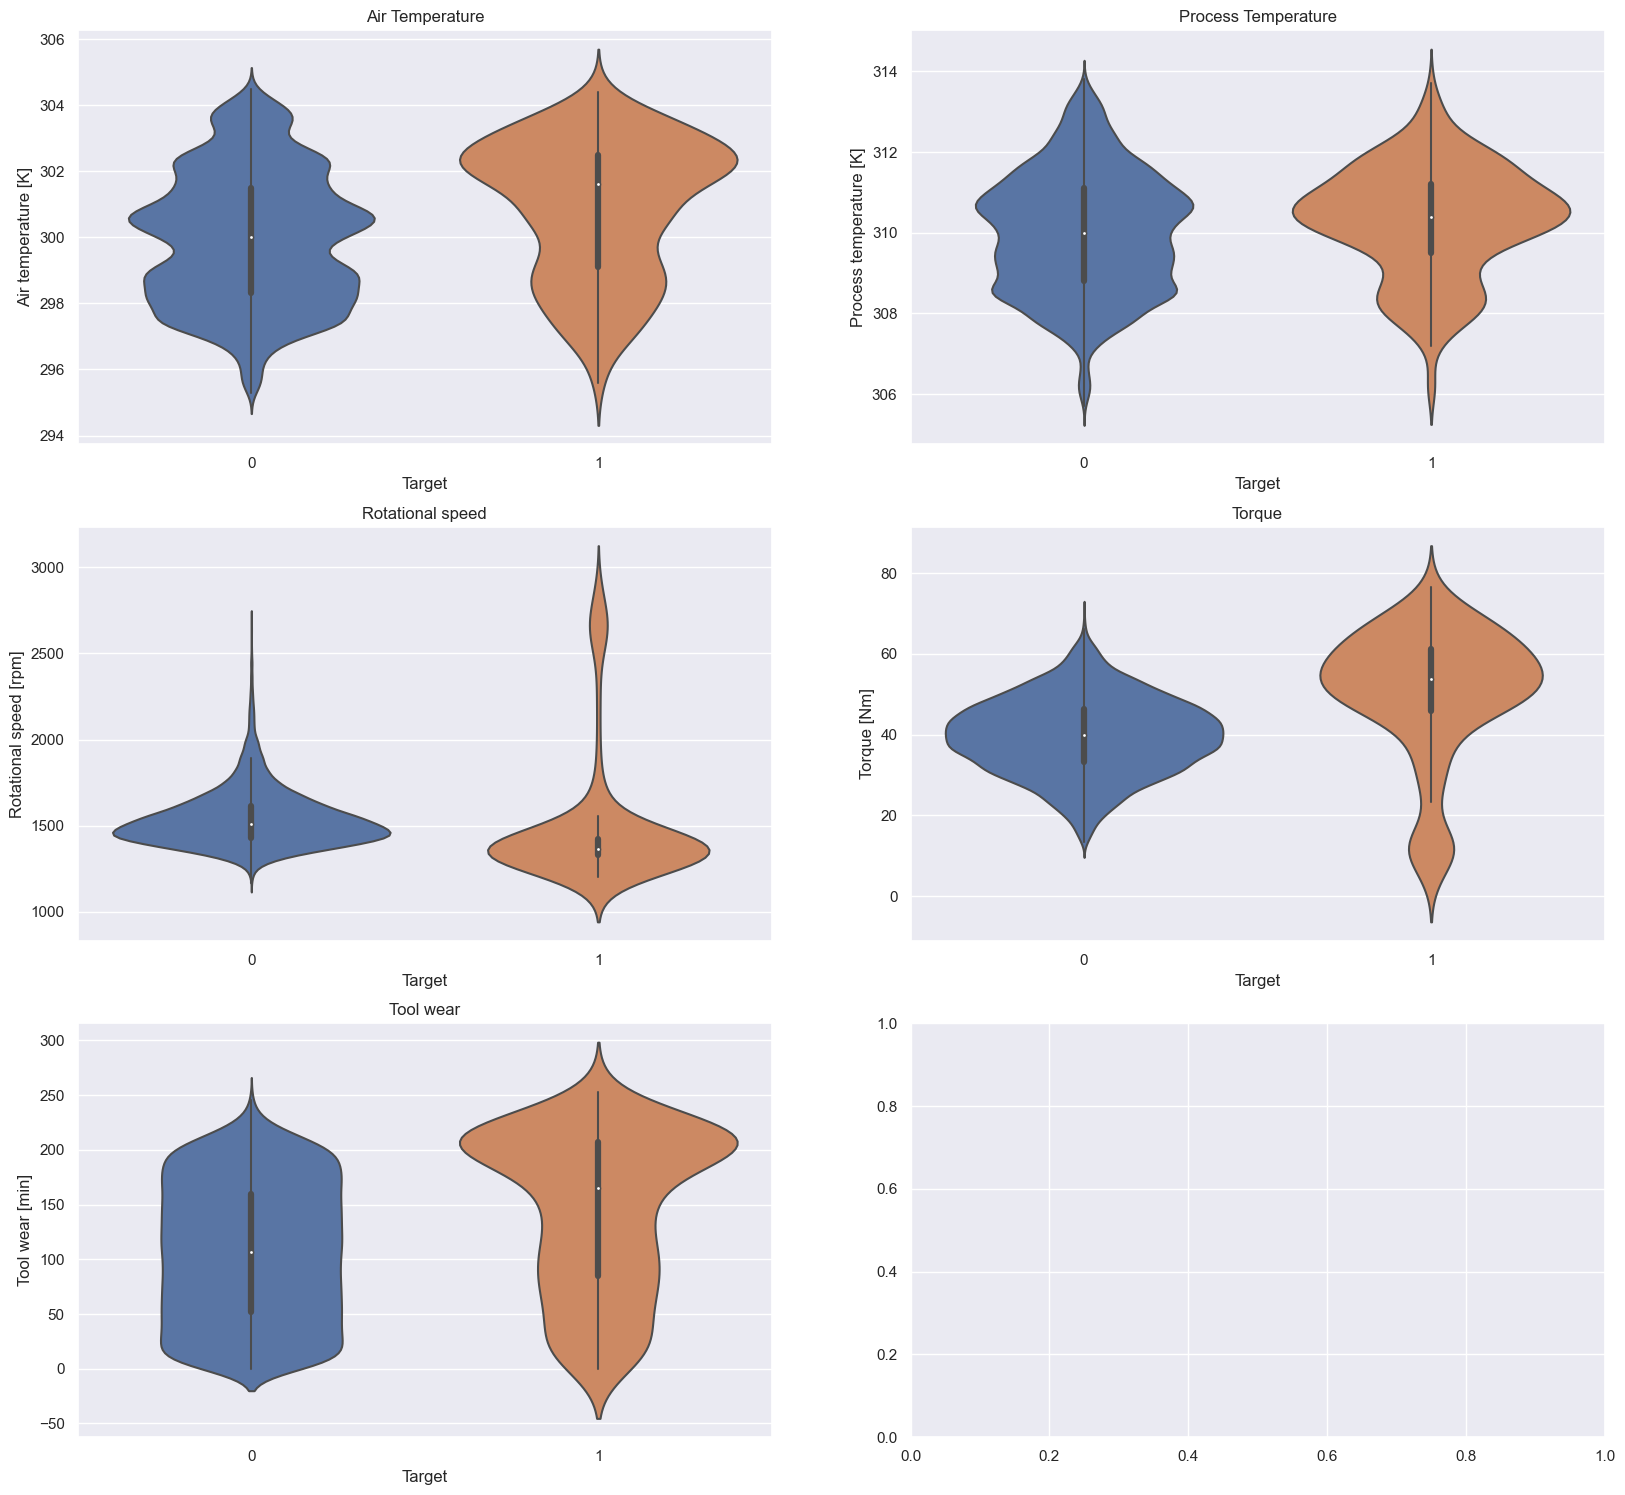

In [14]:
fig, axes = plt.subplots(3, 2)
g1 = sns.violinplot(data=df_binary, y="Air temperature [K]", x="Target", ax=axes[0,0])
g2 = sns.violinplot(data=df_binary, y="Process temperature [K]", x="Target", ax=axes[0,1])
g3 = sns.violinplot(data=df_binary, y="Rotational speed [rpm]", x="Target", ax=axes[1,0])
g4 = sns.violinplot(data=df_binary, y="Torque [Nm]", x="Target", ax=axes[1,1])
g5 = sns.violinplot(data=df_binary, y="Tool wear [min]", x="Target", ax=axes[2,0])

g1.set_title("Air Temperature")
g2.set_title("Process Temperature")
g3.set_title("Rotational speed")
g4.set_title("Torque")
g5.set_title("Tool wear")

We can now plot the histogram of each feature, splitting them depending in the failure status.

/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

<Axes: xlabel='Tool wear [min]', ylabel='Count'>

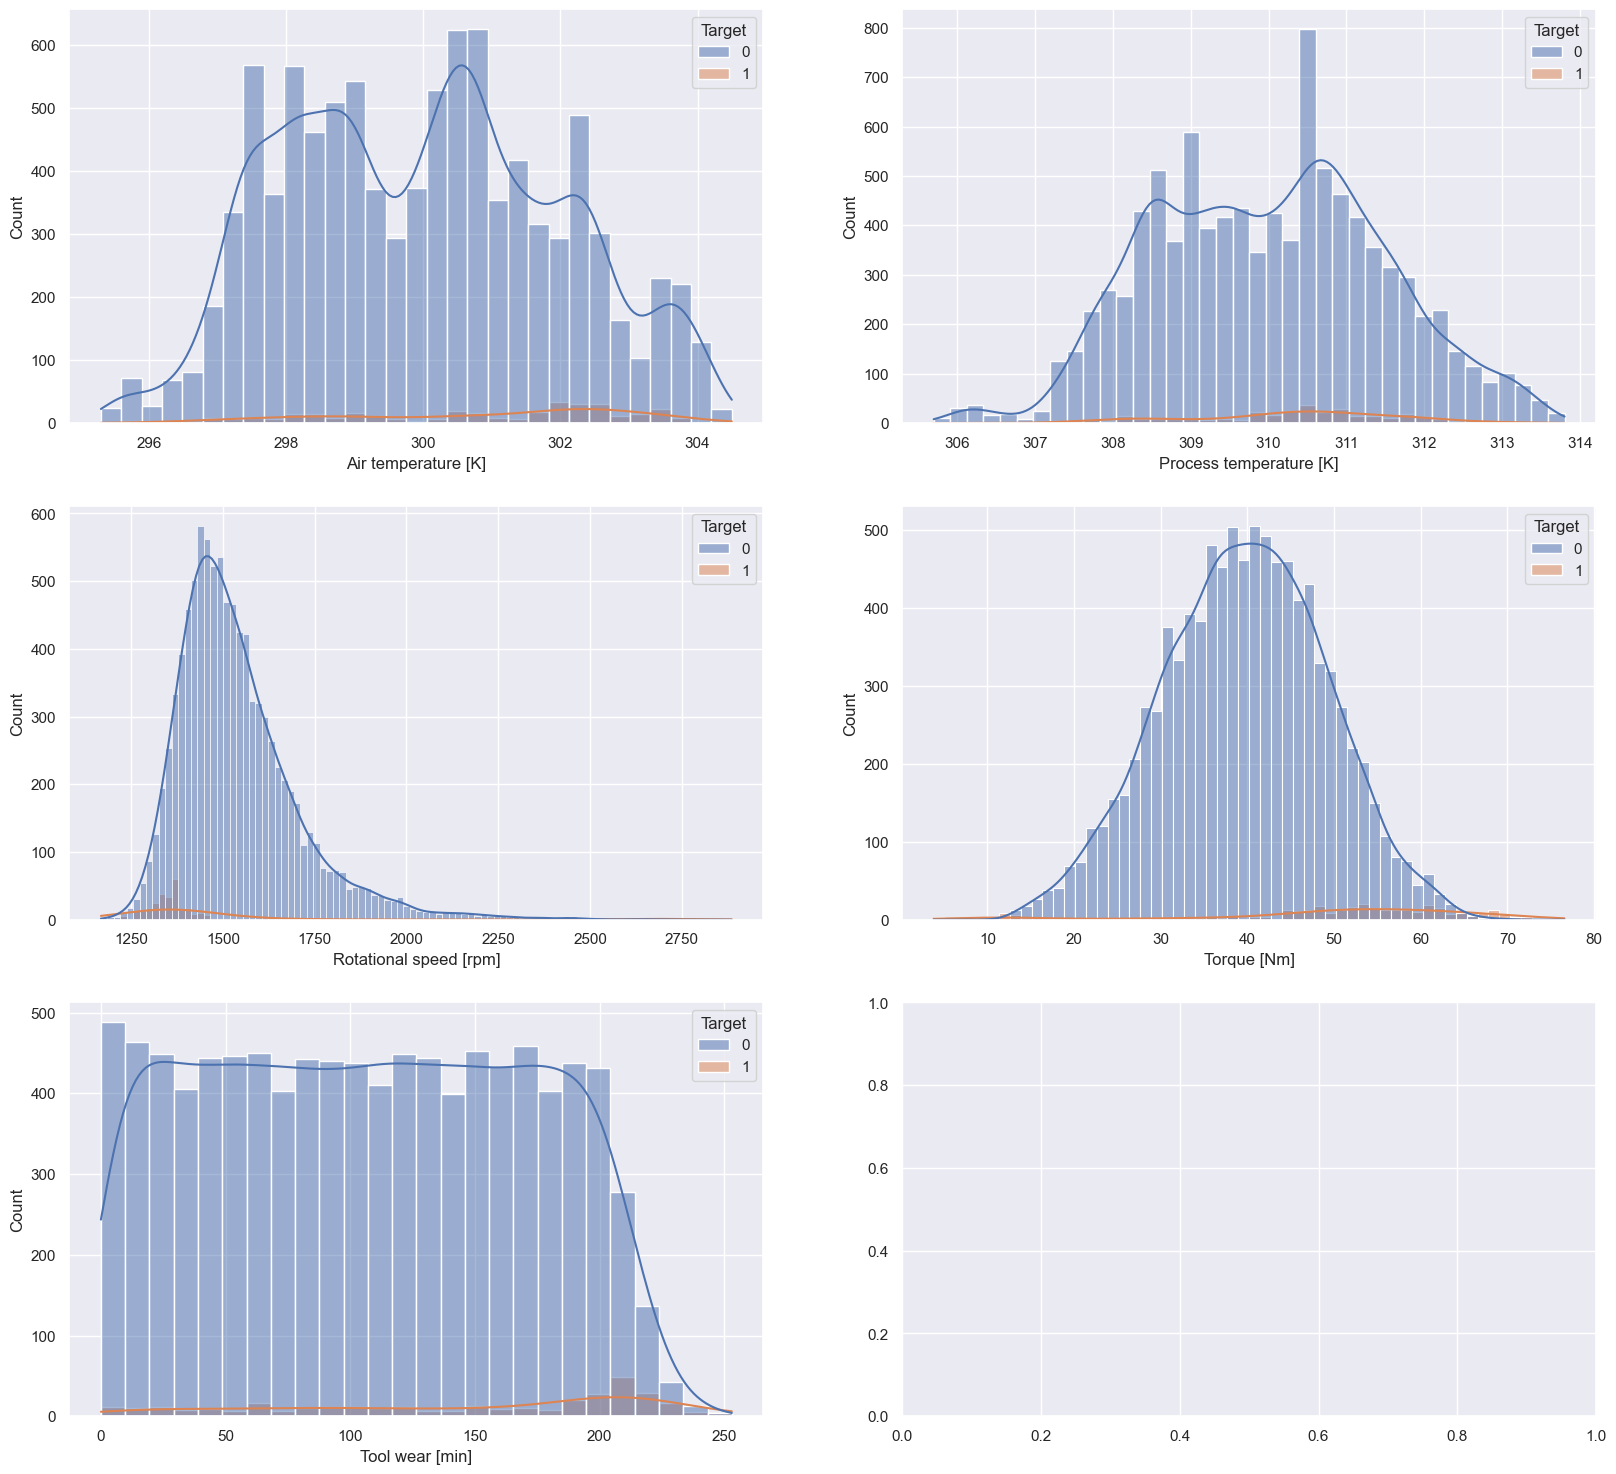

In [15]:
fig, axes = plt.subplots(3, 2)
sns.histplot(data=df_binary, x="Air temperature [K]", hue="Target", kde=True, ax=axes[0,0])
sns.histplot(data=df_binary, x="Process temperature [K]", hue="Target", kde=True, ax=axes[0,1])
sns.histplot(data=df_binary, x="Rotational speed [rpm]", hue="Target", kde=True, ax=axes[1,0])
sns.histplot(data=df_binary, x="Torque [Nm]", hue="Target", kde=True, ax=axes[1,1])
sns.histplot(data=df_binary, x="Tool wear [min]", hue="Target", kde=True, ax=axes[2,0])

To be able to compare both distributions easily, let's plot the same distributions but using separated normalizations.

/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

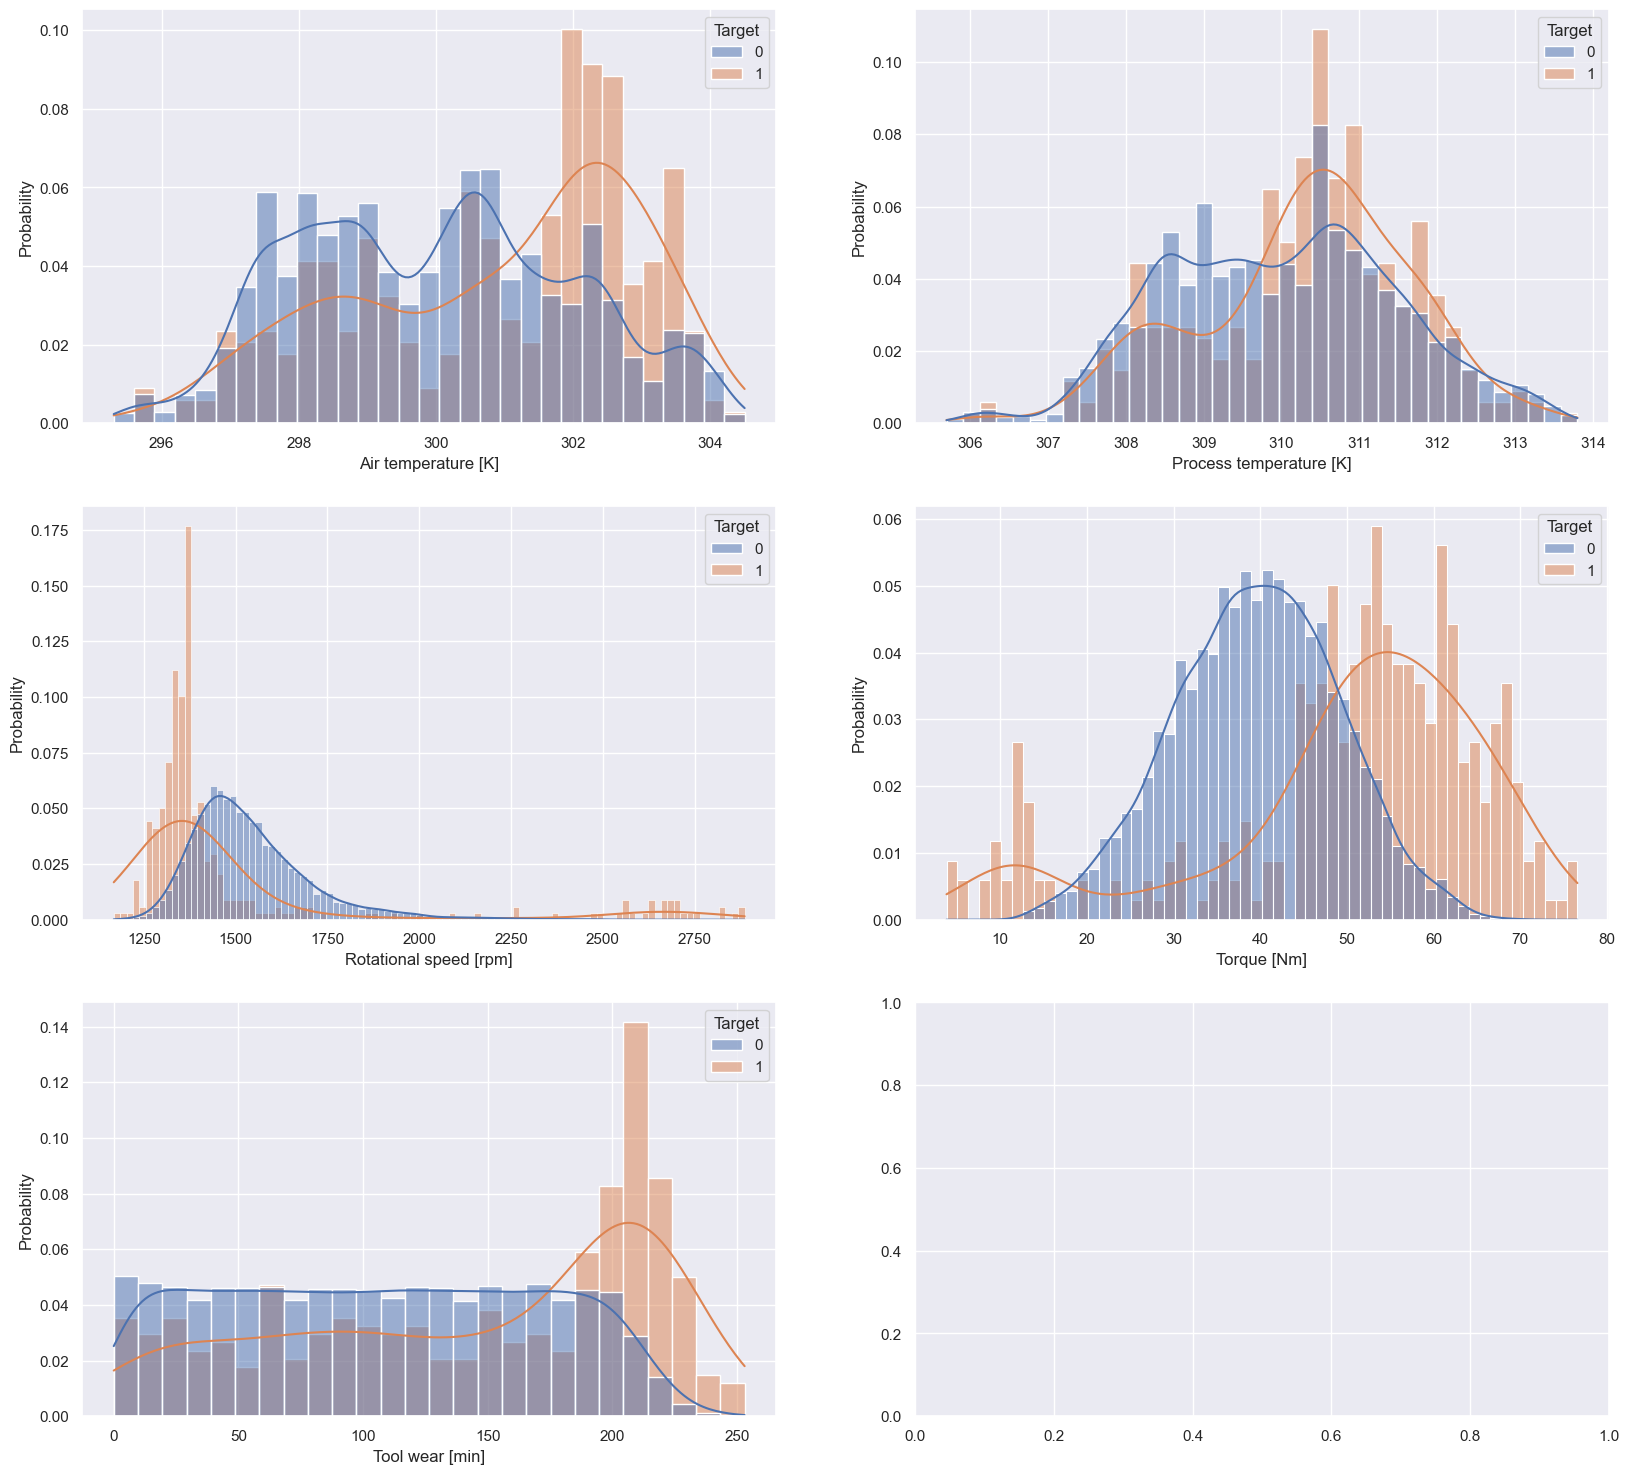

In [16]:
fig, axes = plt.subplots(3, 2)
sns.histplot(data=df_binary, x="Air temperature [K]", hue="Target", kde=True, ax=axes[0,0], stat="probability", common_norm=False)
sns.histplot(data=df_binary, x="Process temperature [K]", hue="Target", kde=True, ax=axes[0,1], stat="probability", common_norm=False)
sns.histplot(data=df_binary, x="Rotational speed [rpm]", hue="Target", kde=True, ax=axes[1,0], stat="probability", common_norm=False)
sns.histplot(data=df_binary, x="Torque [Nm]", hue="Target", kde=True, ax=axes[1,1], stat="probability", common_norm=False)
sns.histplot(data=df_binary, x="Tool wear [min]", hue="Target", kde=True, ax=axes[2,0], stat="probability", common_norm=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Train test split

In [17]:
from sklearn.model_selection import train_test_split

X_binary = df_binary.drop("Target", axis=1)
y_binary = df_binary["Target"]

X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)
X_binary_train.shape, X_binary_test.shape, y_binary_train.shape, y_binary_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

## Checking the data

Are there any duplicated rows in the dataset?

In [18]:
duplicate = df_binary[df_binary.duplicated(keep = "first")]
duplicate.shape

(0, 6)

Are there any rows with missing values in the dataset?

In [19]:
df_binary.isnull().sum()

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

## Scaling

Some ML algorithms need the features to be standardized, so let's do this now. We make sure to only fir the scaler to the training data to avoid data leakage to the test dataset.

In [20]:
from sklearn.preprocessing import StandardScaler

to_scale = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]

sc = StandardScaler()
X_binary_train[to_scale] = sc.fit_transform(X_binary_train[to_scale])
X_binary_test[to_scale] = sc.transform(X_binary_test[to_scale])

We can check that all the features now have a mean of 0 and standard deviation of 1.

In [21]:
X_binary_train.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,-3.342171e-14,-2.343170e-14,1.811884e-16,-3.126388e-16,9.414691e-17
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-2.352493e+00,-2.897008e+00,-1.981233e+00,-3.628570e+00,-1.709378e+00
25%,-8.540660e-01,-8.114199e-01,-6.411277e-01,-6.822446e-01,-8.710502e-01
50%,4.499028e-02,6.318154e-02,-2.036552e-01,1.926135e-02,-1.087453e-03
75%,7.442563e-01,7.359519e-01,4.013305e-01,6.806813e-01,8.530578e-01
max,2.242683e+00,2.552432e+00,7.460419e+00,3.627006e+00,2.292451e+00


In [22]:
X_binary_test.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.012474,-0.001774,-0.000015,-0.010467,-0.009313
std,0.995330,0.991025,0.963490,0.995135,1.033775
min,-2.302546,-2.762454,-2.053222,-3.548398,-1.709378
25%,-0.854066,-0.811420,-0.636974,-0.682245,-0.918503
50%,0.044990,-0.004095,-0.170429,-0.020825,-0.016905
75%,0.744256,0.735952,0.412406,0.670660,0.900510
max,2.192736,2.485155,7.321979,3.667092,2.181728


## PCA (Principal Component Analysis)

For completeness, let's try to see which feature explains the most of the variance in the dataset.

[0.38265651 0.36815285 0.19999595 0.02510272 0.02409196]


/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'Feature name'), Text(0, 0.5, '% of variance explained')]

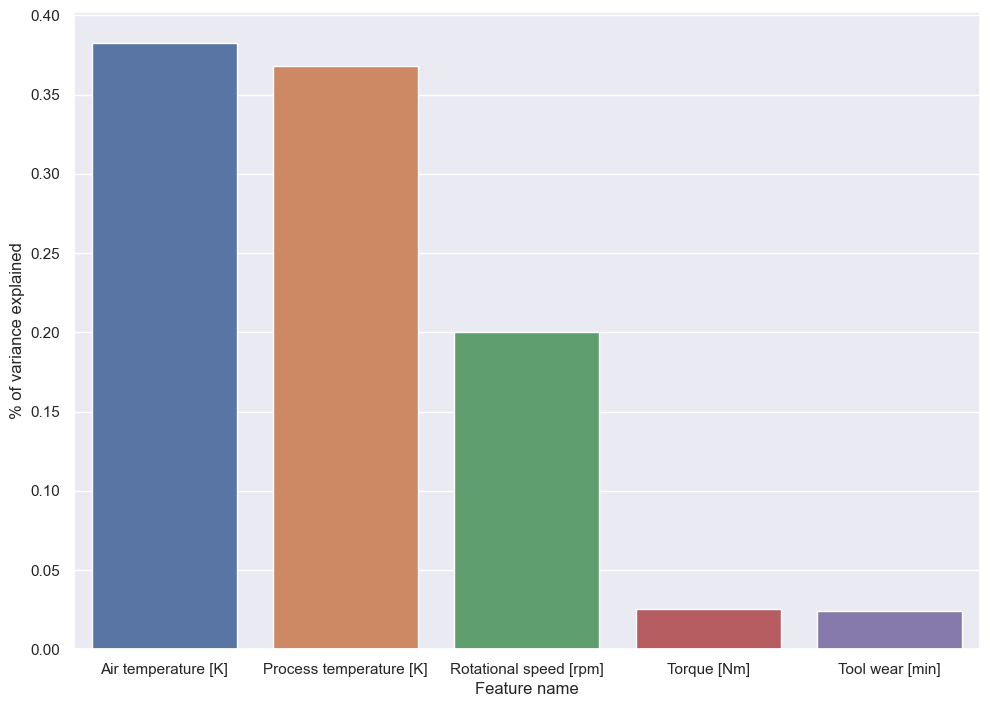

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98)
pca.fit(X_binary_train, y_binary_train)
print(pca.explained_variance_ratio_)

ax = sns.barplot(x=X_binary_train.columns, y=pca.explained_variance_ratio_)
ax.set(xlabel="Feature name", ylabel="% of variance explained")

## Model training

As the classes are highly imbalanced, accuracy is not the best metrics to use. Let's then focus on the precision and recall instead.

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

Let's define a few different models to try out to see how they compare.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)

result = {}
for model,name in zip([lr, dtc, rfc],
                     ["Logistic Regression", "Decision Tree", "Random Forest"]):
    result[name] = fit_model(model, X_binary_train, X_binary_test, y_binary_train, y_binary_test)

In [26]:
df_result = pd.DataFrame(np.array(list(result.values())),
                       columns= ["ACCURACY", "PRECISION", "RECALL", "F1-SCORE"], 
                       index= result.keys())

df_result.index.name = "Model"   # name the index of the result1 dataframe as 'Model'
df_result

,ACCURACY,PRECISION,RECALL,F1-SCORE
Model,,,,
Logistic Regression,0.973,0.640000,0.262295,0.372093
Decision Tree,0.980,0.652174,0.737705,0.692308
Random Forest,0.983,0.800000,0.590164,0.679245


## Hyperparameters tuning

Let's now optimize the model which features the best f1 score out of the box, the Decision Tree, by perofrming a grid search.

In [27]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "max_depth": [2, 4, 6, 8, 10, 12, 15, 20],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [2, 3, 4, 5, 6]
}

gs = GridSearchCV(dtc, grid_params, cv=5)
print(fit_model(gs, X_binary_train, X_binary_test, y_binary_train, y_binary_test))
print(f"Best model: {gs.best_estimator_}")

(0.9805, 0.6896551724137931, 0.6557377049180327, 0.6722689075630253)
Best model: DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)


[Text(0.546875, 0.9, 'x[3] <= 2.5\ngini = 0.067\nsamples = 8000\nvalue = [7722, 278]'),
 Text(0.28125, 0.7, 'x[3] <= -2.692\ngini = 0.058\nsamples = 7950\nvalue = [7714, 236]'),
 Text(0.125, 0.5, 'x[3] <= -2.747\ngini = 0.147\nsamples = 25\nvalue = [2, 23]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.1875, 0.3, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.4375, 0.5, 'x[2] <= -0.876\ngini = 0.052\nsamples = 7925\nvalue = [7712, 213]'),
 Text(0.3125, 0.3, 'x[0] <= 0.769\ngini = 0.235\nsamples = 1059\nvalue = [915, 144]'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.1, '\n  (...)  \n'),
 Text(0.5625, 0.3, 'x[3] <= 2.149\ngini = 0.02\nsamples = 6866\nvalue = [6797, 69]'),
 Text(0.5, 0.1, '\n  (...)  \n'),
 Text(0.625, 0.1, '\n  (...)  \n'),
 Text(0.8125, 0.7, 'x[2] <= -1.718\ngini = 0.269\nsamples = 50\nvalue = [8, 42]'),
 Text(0.75, 0.5, 'gini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.875, 0.5, 'x[2] <= -1.439\ngini = 0.093\nsamples = 41

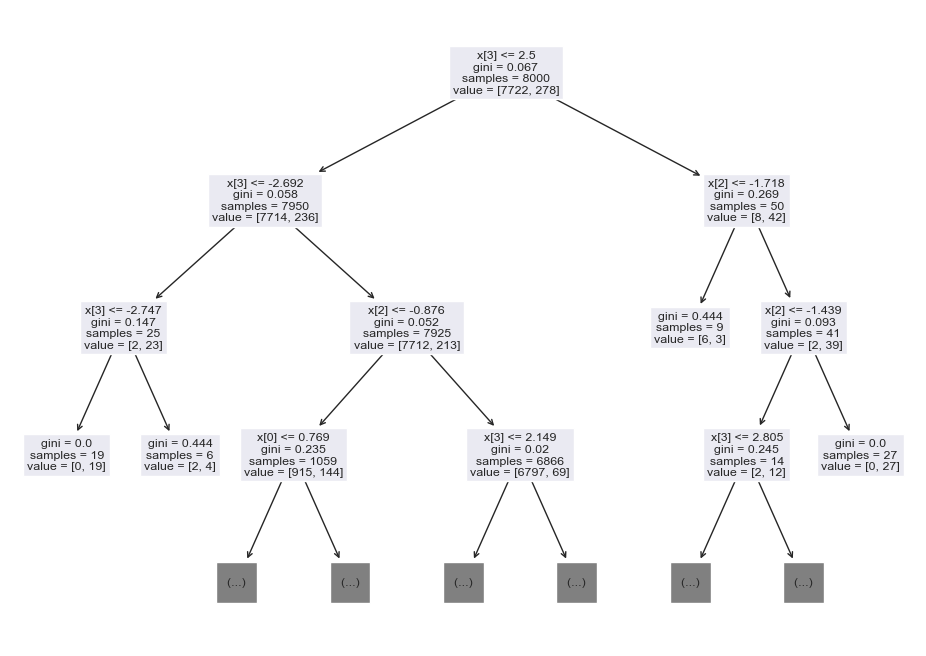

In [28]:
from sklearn.tree import plot_tree

plot_tree(gs.best_estimator_, max_depth=3)

In [29]:
from sklearn.metrics import classification_report

y_pred = gs.best_estimator_.predict(X_binary_test)
report = pd.DataFrame(classification_report(y_binary_test, y_pred, output_dict=True)).T
report

,precision,recall,f1-score,support
0,0.989186,0.990717,0.989951,1939.0000
1,0.689655,0.655738,0.672269,61.0000
accuracy,0.980500,0.980500,0.980500,0.9805
macro avg,0.839421,0.823227,0.831110,2000.0000
weighted avg,0.980051,0.980500,0.980262,2000.0000


We achieved a f1 score of 98% using this optimized model! This is much better than the 70% we obtained with the Decision Tree out of the box.